# Array-Based Sequences

## Low-Level Arrays
The primary memory of a computer is composed of bits of information, and those bits are typically grouped into larger units that depend upon the precise system architecture.
Such a typical unit is a byte, which is equivalent to 8 bits.
A computer system will have a huge number of bytes of memory, and to keep track of what information is stored in what byte, the computer uses an abstraction known as a memory address. 
In effect, each byte of memory is associated with a unique number that serves as its address (more formally, the binary representation of the number serves as the address).

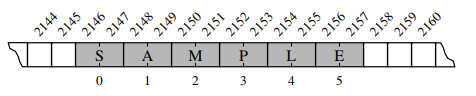

The computer system can refer to the data in “byte # 2150” versus the data in “byte # 2157,” for example. Memory addresses are typically coordinated with the physical layout of the memory system, and so we often portray the numbers in sequential fashion
any byte of the main memory can be efficiently accessed
based upon its memory address. In this sense, we say that a computer’s main memory performs as random access memory (RAM). That is, it is just as easy to retrieve byte # 8675309 as it is to retrieve byte # 309.
Using the notation for asymptotic analysis, we say that any individual byte of memory can be stored or retrieved in O(1) time.

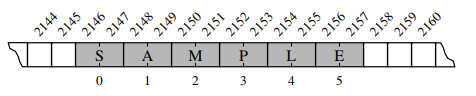

Python internally represents each Unicode character with 16 bits (i.e., 2 bytes). Therefore, a six-character string, such
as SAMPLE , would be stored in 12 consecutive bytes of memory
We describe this as an array of six characters, even though it requires 12 bytes of memory. We will refer to each location within an array as a cell, and will use an integer index to describe its location within the array, with cells numbered starting
with 0, 1, 2, and so on.

Each cell of an array must use the same number of bytes. This requirement is what allows an arbitrary cell of the array to be accessed in constant time based on its index

If one knows the memory address at which an array starts (e.g., 2146 in Figure 5.2), the number of bytes per element (e.g., 2 for a Unicode character), and a desired index within the array, the appropriate memory address can be computed using the calculation, start + cellsize index.
As an example, cell 4 of Figure 5.2 begins at memory location 2146+2 · 4 = 2146+8 = 2154.


## Referential Arrays

If we assume that the hospital has 200 beds, and conveniently that those beds are numbered from 0 to 199, we might consider using an array-based structure to maintain the names of the patients currently assigned to those beds.
    [ Rene , Joseph , Janet , Jonas , Helen , Virginia , ... ]
    
To represent such a list with an array, Python must adhere to the requirement that each cell of the array use the same number of bytes. Yet the elements are strings, and strings naturally have different lengths. Python could attempt to reserve enough space for each cell to hold the maximum length string (not just of currently stored strings, but of any string we might ever want to store), but that would be wasteful.

Instead, Python represents a list or tuple instance using an internal storage mechanism of an array of object references. At the lowest level, what is stored is a consecutive sequence of memory addresses at which the elements of the sequence reside. A high-level diagram of such a list is shown in Figure 5.4.

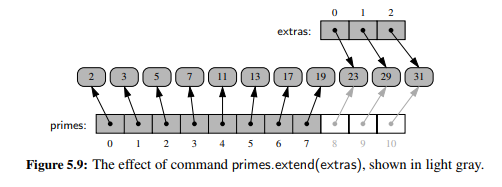

Although the relative size of the individual elements may vary, the number of bits used to store the memory address of each element is fixed (e.g., 64-bits per address). In this way, Python can support constant-time access to a list or tuple
element based on its index.

A single list instance may include multiple references to the same object as elements of the list, and it is possible for a single object to be an element of two or more lists, as those lists simply store references back to
that object. 
As an example, when you compute a slice of a list, the result is a new list instance, but that new list has references to the same elements that are in the original list, as portrayed in Figure 5.5.

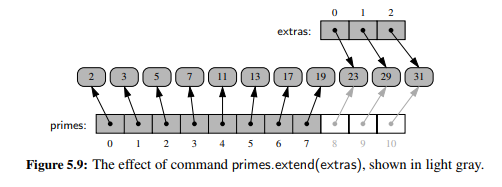

When the elements of the list are immutable objects, as with the integer instances in Figure 5.5, the fact that the two lists share elements is not that significant, as neither of the lists can cause a change to the shared object. If, for example,
the command temp[2] = 15 were executed from this configuration, that does not change the existing integer object; it changes the reference in cell 2 of the temp list to reference a different object. The resulting configuration is shown in Figure 5.6.

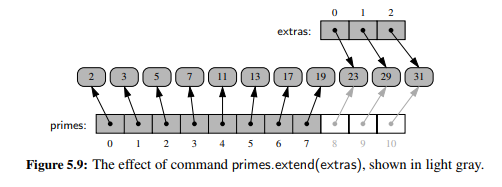

As a more striking example, it is a common practice in Python to initialize an
array of integers using a syntax such as counters = [0] 8. This syntax produces
a list of length eight, with all eight elements being the value zero. Technically, all
eight cells of the list reference the same object,

At first glance, the extreme level of aliasing in this configuration may seem
alarming. However, we rely on the fact that the referenced integer is immutable.
Even a command such as counters[2] += 1 does not technically change the value
of the existing integer instance. This computes a new integer, with value 0+1, and
sets cell 2 to reference the newly computed value.

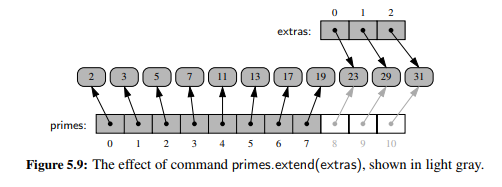

As a final manifestation of the referential nature of lists, we note that the extend
command is used to add all elements from one list to the end of another list. The
extended list does not receive copies of those elements, it receives references to
those elements. 

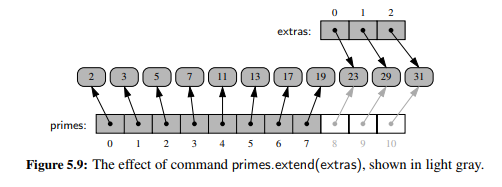



## Compact Arrays in Python

strings are represented using an array of characters (not an array of references). We will refer to this more direct
representation as a compact array because the array is storing the bits that represent
the primary data (characters, in the case of strings).
Compact arrays have several advantages over referential structures in terms
of computing performance. Most significantly, the overall memory usage will be
much lower for a compact structure because there is no overhead devoted to the
explicit storage of the sequence of memory references (in addition to the primary
data). That is, a referential structure will typically use 64-bits for the memory
address stored in the array, on top of whatever number of bits are used to represent
the object that is considered the element. Also, each Unicode character stored in
a compact array within a string typically requires 2 bytes. If each character were
stored independently as a one-character string, there would be significantly more
bytes used.

Another important advantage to a compact structure for high-performance computing is that the primary data are stored consecutively in memory. Note well that
this is not the case for a referential structure. That is, even though a list maintains
careful ordering of the sequence of memory addresses, where those elements reside
in memory is not determined by the list. Because of the workings of the cache and
memory hierarchies of computers, it is often advantageous to have data stored in
memory near other data that might be used in the same computations

Primary support for compact arrays is in a module named array. That module
defines a class, also named array, providing compact storage for arrays of primitive
data types.

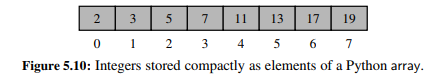

The public interface for the array class conforms mostly to that of a Python list.
However, the constructor for the array class requires a type code as a first parameter,
which is a character that designates the type of data that will be stored in the array.
As a tangible example, the type code, i , designates an array of (signed) integers,
typically represented using at least 16-bits each. We can declare the array shown in

primes = array( i , [2, 3, 5, 7, 11, 13, 17, 19])

The type code allows the interpreter to determine precisely how many bits are
needed per element of the array. 

## Dynamic Arrays and Amortization



Python’s list class presents a more interesting abstraction. Although a list has a
particular length when constructed, the class allows us to add elements to the list,
with no apparent limit on the overall capacity of the list. To provide this abstraction,
Python relies on an algorithmic sleight of hand known as a dynamic array.

In [3]:
import sys # provides getsizeof function
data = [ ]
for k in range(5):  
    a = len(data) # number of elements
    b = sys.getsizeof(data) # actual size in bytes
    print( 'Length: {0:3d}; Size in bytes: {1:4d}'.format(a, b))
    data.append(None) # increase length by one

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96


## Implementing a Dynamic Array

The key is to provide means to grow the array A that stores the elements of a
list. Of course, we cannot actually grow that array, as its capacity is fixed. If an
element is appended to a list at a time when the underlying array is full, we perform
the following steps:
1. Allocate a new array B with larger capacity.
2. Set B[i] = A[i], for i = 0,...,n−1, where n denotes current number of items.
3. Set A = B, that is, we henceforth use B as the array supporting the list.
4. Insert the new element in the new array.

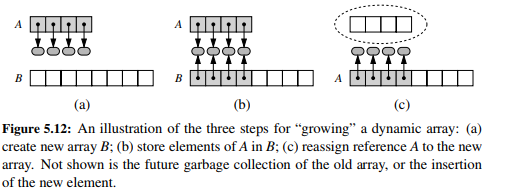

